In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

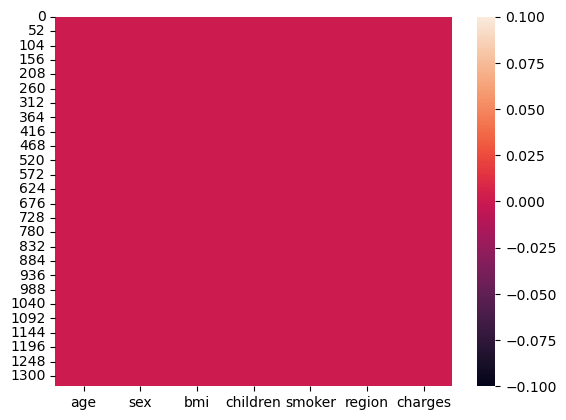

In [10]:
sns.heatmap(df.isna())
plt.show()

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [13]:
from pandas_profiling import ProfileReport

In [14]:
report = ProfileReport(df,explorative=True,orange_mode=True)
report.to_widgets
report.to_file('medical.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
print('max charfes',df.charges.max())
print('min charges',df.charges.min())

max charfes 63770.42801
min charges 1121.8739


In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('categorical column :- ',cat_col)
print('\n')

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('numerical columns :-',num_col)

categorical column :-  ['sex', 'smoker', 'region']


numerical columns :- ['age', 'bmi', 'children', 'charges']


In [18]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

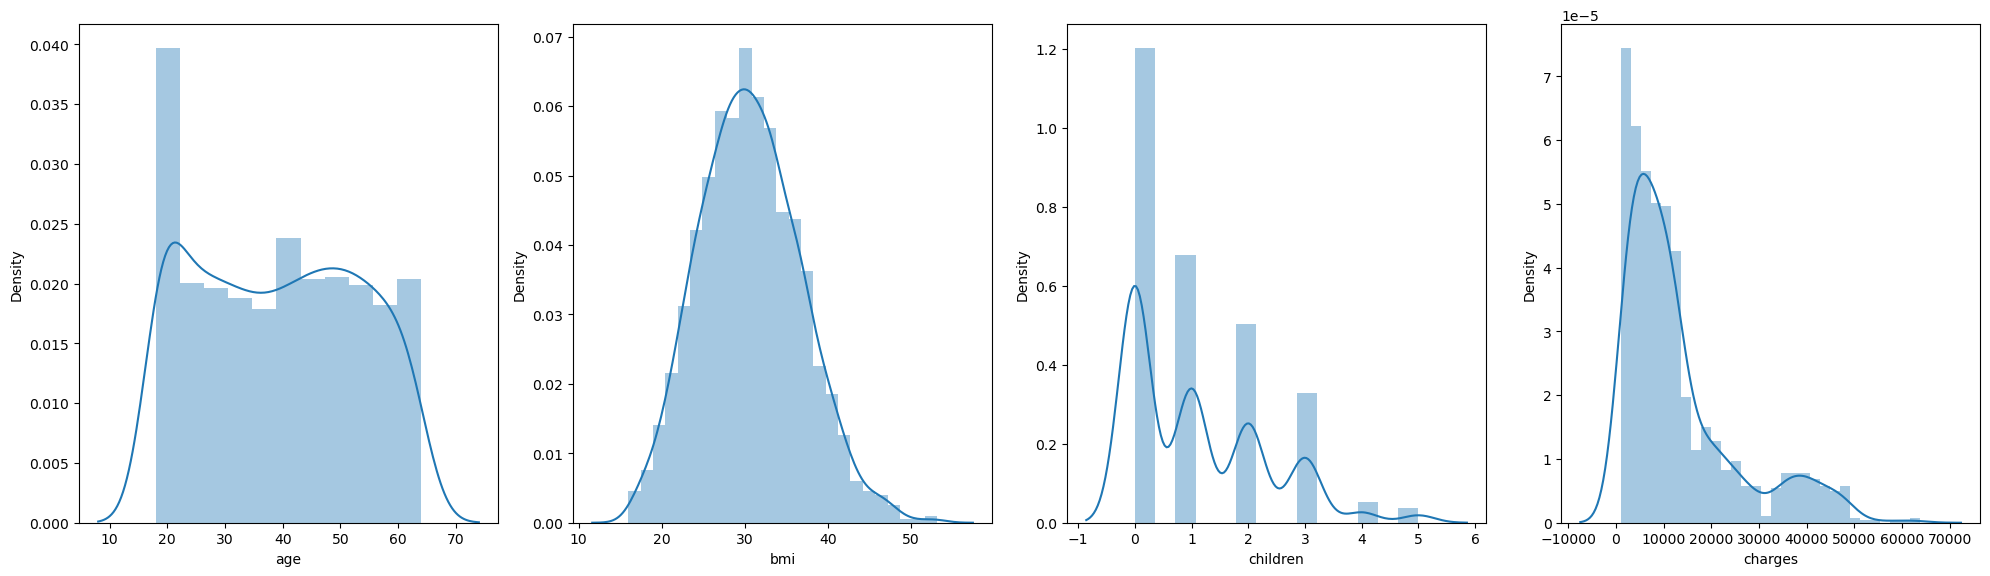

In [19]:
plt.figure(figsize=(20,11))
plotnumber =1
for column in num_col:
    if plotnumber<=4:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

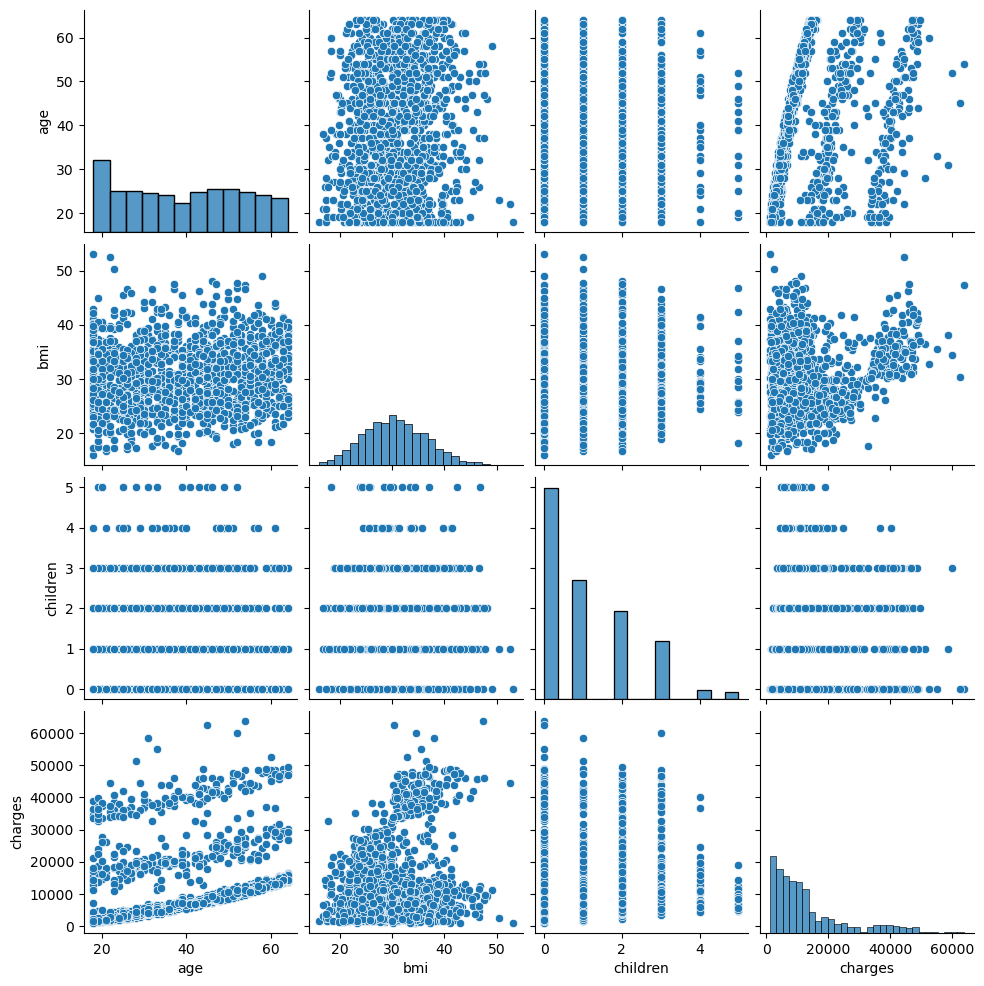

In [20]:
sns.pairplot(df)
plt.show()

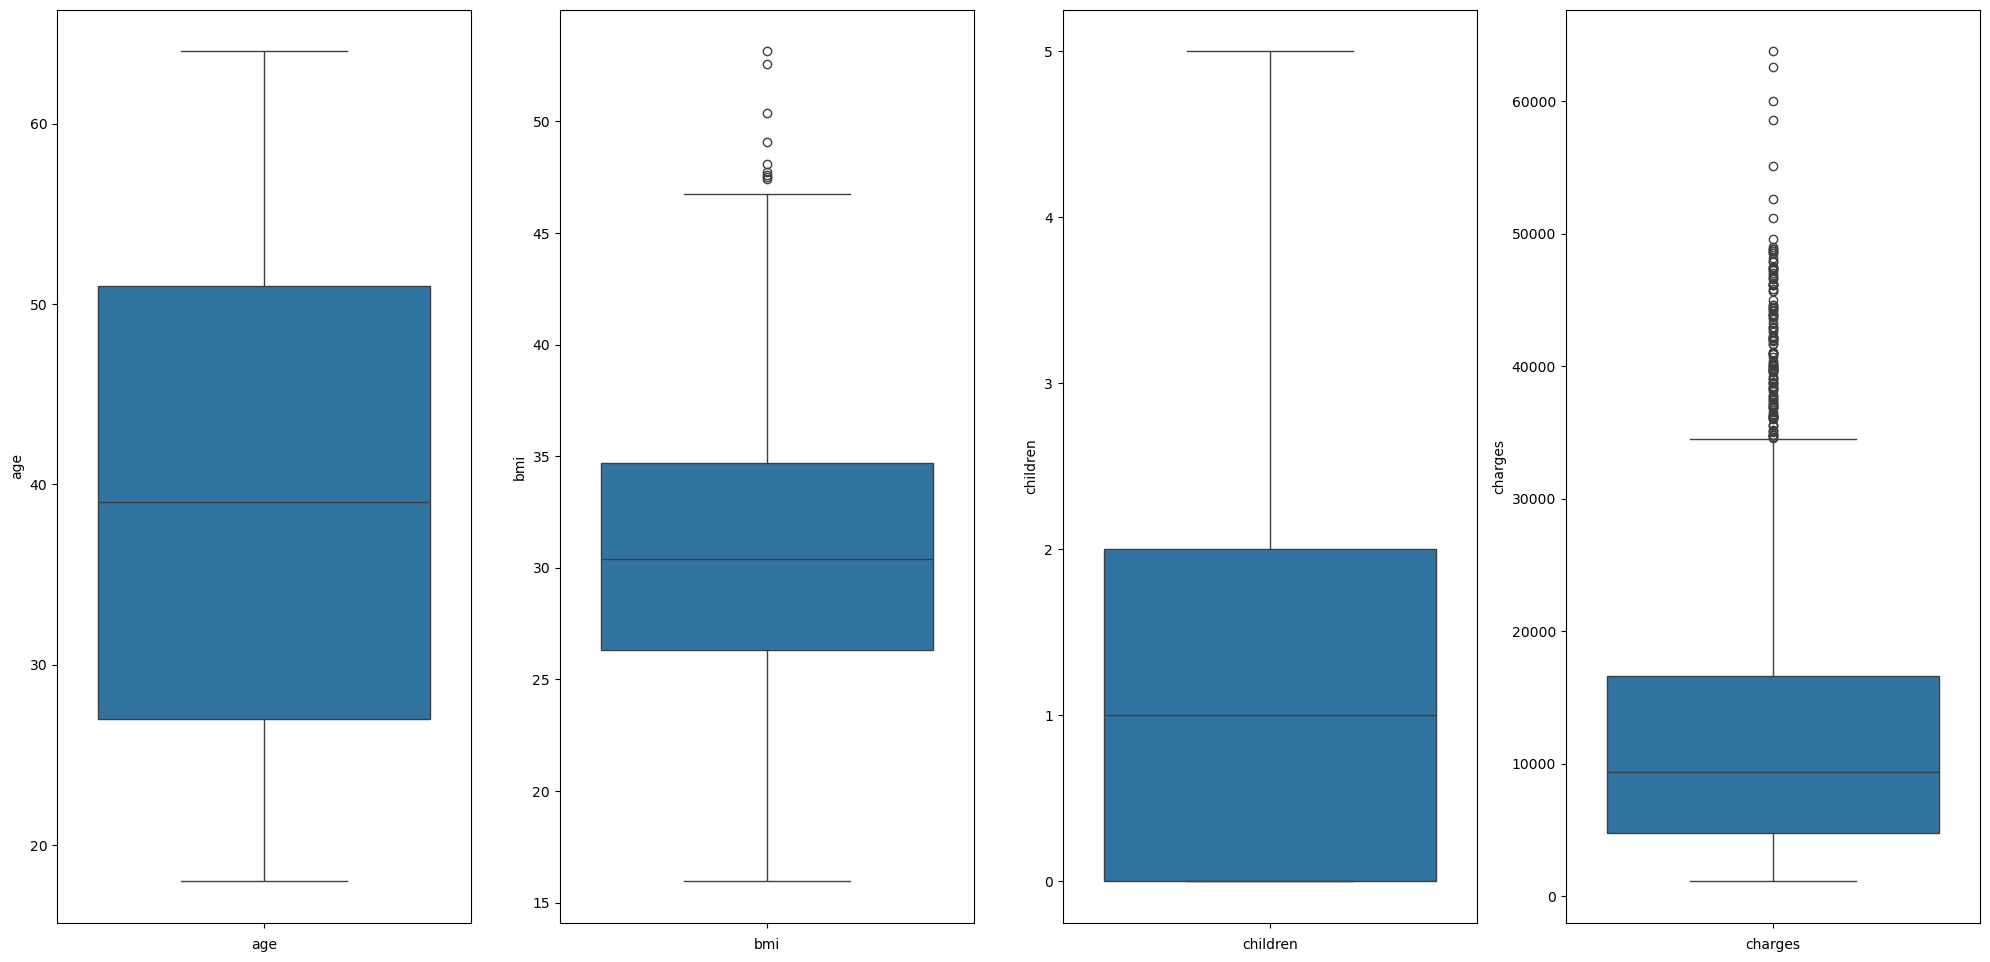

In [21]:
# find outliers

plt.figure(figsize=(20,19))
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

Old Shape:  (1338, 7)
New Shape:  (1329, 7)


<Axes: xlabel='bmi'>

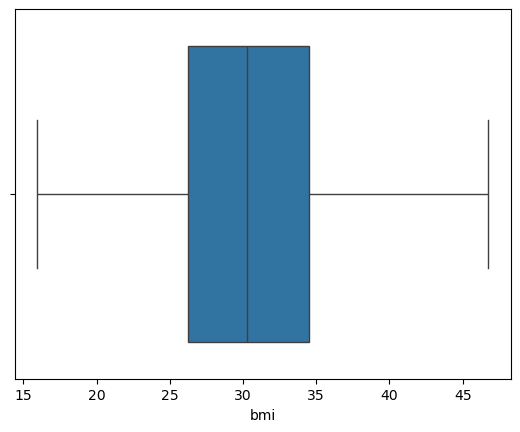

In [22]:

# IQR
Q1 = np.percentile(df['bmi'], 25,interpolation = 'midpoint')

Q3 = np.percentile(df['bmi'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['bmi'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['bmi'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='bmi', data=df)


In [23]:
df.shape

(1329, 7)

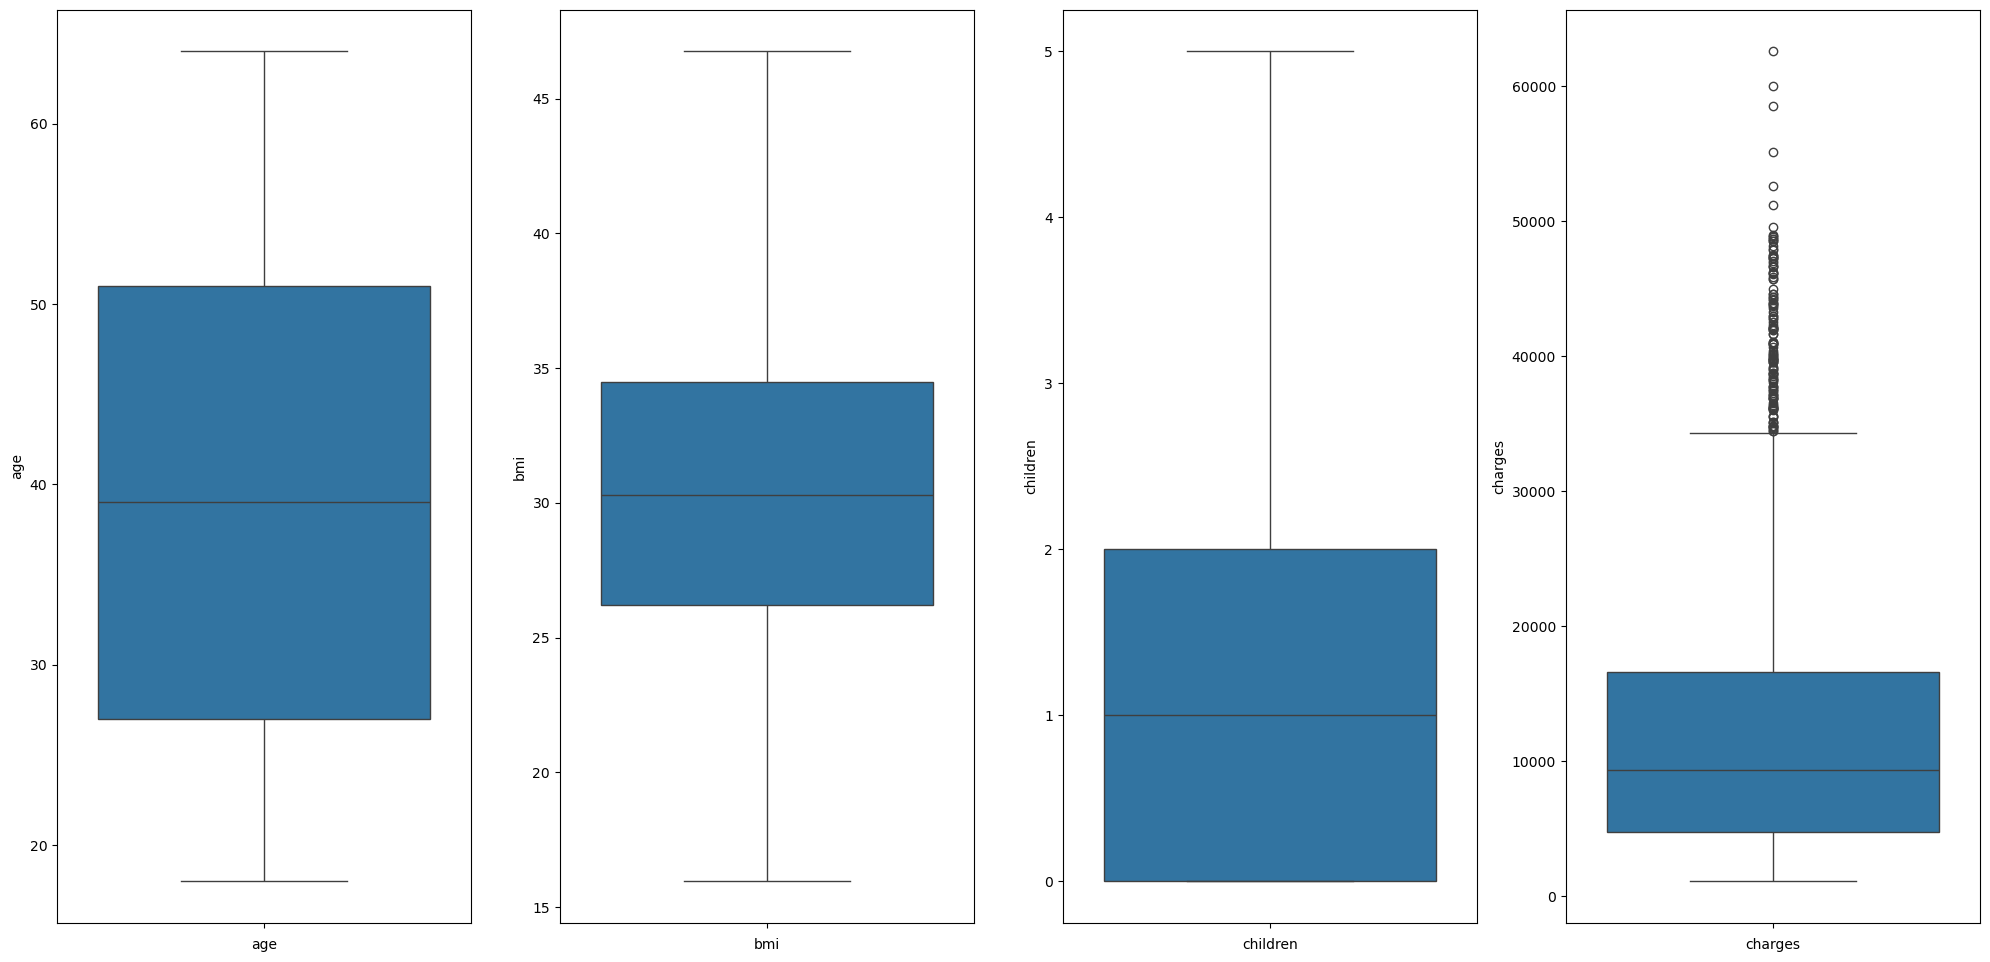

In [24]:
# after removing outliers

plt.figure(figsize=(20,19))
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [25]:
# Encoding Method 

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [26]:
df.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region     -0.031651
charges     1.500577
dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   float64
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   float64
 5   region    1329 non-null   float64
 6   charges   1329 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.1 KB


In [28]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


In [29]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


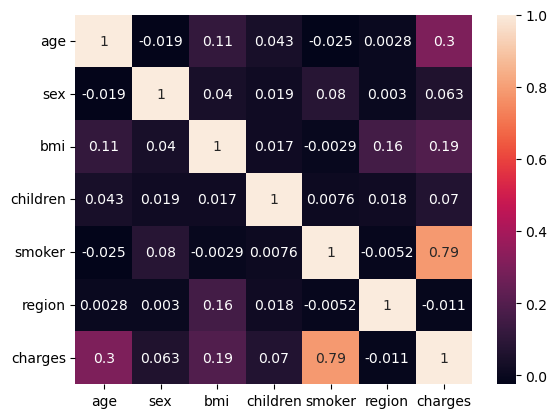

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Feature Selectio

In [31]:
X= df.drop('charges',axis=1)
y = df['charges']

In [32]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [33]:
X

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


In [35]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF value']= [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['features']=X.columns

vif

,VIF value,features
0,1.016476,age
1,1.008922,sex
2,1.040761,bmi
3,1.002702,children
4,1.007041,smoker
5,1.025432,region


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [37]:
# Finding best random state

maxAcc = 0
maxRS = 0

for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred= lr.predict(X_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    
print('max r2 score is :- ',maxAcc,'random state :- ',maxRS)

max r2 score is :-  0.812206206868082 random state :-  86


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=maxRS)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [40]:
# LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
pred_train = lr.predict(X_train)
print(lr)
print('r2 score :- ',r2_score(y_test,predlr)*100)
print('r2 score on training :- ',r2_score(y_train,pred_train)*100)
print('mean_absolute_error :- ',mean_absolute_error(y_test,predlr))
print('mean_squared_error:- ',mean_squared_error(y_test,predlr))
print('root mean squred error :- ',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
r2 score :-  80.25321609544555
r2 score on training :-  73.35964954943066
mean_absolute_error :-  4189.454650734631
mean_squared_error:-  32252816.504889823
root mean squred error :-  5679.156319814575


In [41]:
# RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
predrfr = rfr.predict(X_test)
pred_train = rfr.predict(X_train)
print(rfr)
print('r2 score :- ',r2_score(y_test,predrfr)*100)
print('r2 score on training :- ',r2_score(y_train,pred_train)*100)
print('mean_absolute_error :- ',mean_absolute_error(y_test,predrfr))
print('mean_squared_error:- ',mean_squared_error(y_test,predrfr))
print('root mean squred error :- ',np.sqrt(mean_squared_error(y_test,predrfr)))

RandomForestRegressor()
r2 score :-  87.64662780091005
r2 score on training :-  97.43278947213877
mean_absolute_error :-  2512.054533786121
mean_squared_error:-  20177009.516064037
root mean squred error :-  4491.88262492065


In [42]:
# KNN

knn = KNN()
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)
pred_train = knn.predict(X_train)
print(knn)
print('r2 score :- ',r2_score(y_test,predknn)*100)
print('r2 score on training :- ',r2_score(y_train,pred_train)*100)
print('mean_absolute_error :- ',mean_absolute_error(y_test,predknn))
print('mean_squared_error:- ',mean_squared_error(y_test,predknn))
print('root mean squred error :- ',np.sqrt(mean_squared_error(y_test,predknn)))

KNeighborsRegressor()
r2 score :-  87.08858654734435
r2 score on training :-  86.27256955276458
mean_absolute_error :-  2861.50231343985
mean_squared_error:-  21088469.439888008
root mean squred error :-  4592.218357165522


In [43]:
# Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
predlasso = lasso.predict(X_test)
pred_train = lasso.predict(X_train)
print(lasso)
print('r2 score ',r2_score(y_test,predlasso)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predlasso))
print('mean squred error ',mean_squared_error(y_test,predlasso))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predlasso)))

Lasso()
r2 score  80.25475295906766
r2 score on training data  73.35964493129322
mean absolute eroor  4189.136160615609
mean squred error  32250306.314843852
root mean squred error  5678.935315254423


In [44]:
# Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)
predridge = ridge.predict(X_test)
pred_train = ridge.predict(X_train)
print(ridge)
print('r2 score ',r2_score(y_test,predridge)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predridge))
print('mean squred error ',mean_squared_error(y_test,predridge))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predridge)))

Ridge()
r2 score  80.24692203879246
r2 score on training data  73.35957935002921
mean absolute eroor  4190.715858976531
mean squred error  32263096.713316903
root mean squred error  5680.061330066507


In [45]:
# GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predgbr = gbr.predict(X_test)
pred_train = gbr.predict(X_train)
print(gbr)
print('r2 score ',r2_score(y_test,predgbr)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predgbr))
print('mean squred error ',mean_squared_error(y_test,predgbr))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predgbr)))

GradientBoostingRegressor()
r2 score  90.31193259303929
r2 score on training data  89.28702860702025
mean absolute eroor  2208.3190508891
mean squred error  15823713.971551558
root mean squred error  3977.9032129441707


In [46]:
# SVR

svr = SVR()
svr.fit(X_train,y_train)
predsvr = gbr.predict(X_test)
pred_train = gbr.predict(X_train)
print(svr)
print('r2 score ',r2_score(y_test,predsvr)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predsvr))
print('mean squred error ',mean_squared_error(y_test,predsvr))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predsvr)))

SVR()
r2 score  90.31193259303929
r2 score on training data  89.28702860702025
mean absolute eroor  2208.3190508891
mean squred error  15823713.971551558
root mean squred error  3977.9032129441707


In [47]:
# cross validation

from sklearn.model_selection import cross_val_score

In [48]:
# cv of linear regression

score = cross_val_score(lr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predlr)-score.mean())*100)

[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
0.7465696971497523
difference between Accuracy score and cross validation score is  =  5.596246380470326


In [49]:
# cv of random forest regressor 

score = cross_val_score(rfr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predrfr)-score.mean())*100)

[0.85458698 0.76550249 0.86389428 0.8238038  0.85222325]
0.8320021607575658
difference between Accuracy score and cross validation score is  =  4.446411725153476


In [50]:
# cv of KNN

score = cross_val_score(knn,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predknn)-score.mean())*100)

[0.82416751 0.75474383 0.83486583 0.79767075 0.80754954]
0.8037994912119608
difference between Accuracy score and cross validation score is  =  6.708637426148267


In [51]:
# cv of Lasso

score = cross_val_score(lasso,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predlasso)-score.mean())*100)

[0.7626132  0.71184884 0.77312553 0.72863003 0.7566523 ]
0.7465739806748187
difference between Accuracy score and cross validation score is  =  5.597354891585793


In [52]:
# cv of Ridge

score = cross_val_score(ridge,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predridge)-score.mean())*100)

[0.76260288 0.71191263 0.77304715 0.72869326 0.75660969]
0.7465731221831348
difference between Accuracy score and cross validation score is  =  5.589609820478991


In [53]:
# cv of Gradiantboosting 

score = cross_val_score(gbr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predgbr)-score.mean())*100)

[0.87608445 0.79346283 0.88889717 0.84505412 0.86066112]
0.8528319384481359
difference between Accuracy score and cross validation score is  =  5.028738748225702


In [54]:
# cv of SVR

score = cross_val_score(svr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predsvr)-score.mean())*100)

[-0.10940544 -0.1136715  -0.06933494 -0.09724682 -0.10838195]
-0.0996081295036014
difference between Accuracy score and cross validation score is  =  100.27274554339942


In [55]:
# Hyperparameter tunning

from sklearn.model_selection import GridSearchCV

In [56]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [57]:
param = {'alpha':[1.0,.05],'fit_intercept':[True,False],
         'copy_X': [True,False],'max_iter':[None],'tol':[0.01],
        'solver':['auto','saga'],
        'positive':[False,True],
        'random_state':[1]
        
        }
gscv = GridSearchCV(Ridge(),param,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05], 'copy_X': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [None],
                         'positive': [False, True], 'random_state': [1],
                         'solver': ['auto', 'saga'], 'tol': [0.01]})

In [58]:
gscv.best_params_

{'alpha': 0.05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 1,
 'solver': 'saga',
 'tol': 0.01}

In [59]:
model =Ridge(alpha=0.05,copy_X=True,fit_intercept=True,max_iter=None,positive=False,random_state=1,solver='saga',tol=0.01)

In [60]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R2 score :',r2_score(y_test,pred))
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('mean square error :',mean_squared_error(y_test,pred))
print('Root mean sq error :',np.sqrt(mean_squared_error(y_test,pred)))

R2 score : 0.8032974670306128
Mean absolute error : 4170.3720904967095
mean square error : 32127817.53511487
Root mean sq error : 5668.140571220413


In [61]:
import pickle
file_name = 'medical_insurance.pkl'
pickle.dump(model,open(file_name,'wb'))

In [62]:
load_model = pickle.load(open('medical_insurance.pkl','rb'))
result = load_model.score(X_test,y_test)
print(result*100)

80.32974670306128


In [63]:
conclusion = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=["Predicted","original"])
conclusion.head(20)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Predicted,2216.971568,38454.415468,28839.40493,33203.616326,11186.011449,30880.148415,15346.732197,6341.742862,2873.499698,13196.621727,...,14346.587322,12203.041482,8470.273509,-883.162563,13461.852357,14378.62907,2948.928532,11492.180975,13596.176475,40238.288821
original,4005.422500,46889.261200,19023.26000,40419.019100,6079.671500,20773.627750,12646.207000,18157.876000,7323.734819,10560.491700,...,10226.284200,12224.350850,6457.843400,1832.094000,10713.644000,8733.22925,2104.113400,8835.264950,11163.568000,48970.247600


#

#